# Naver Conversation of the Day

![Conversation of the Day](https://raw.githubusercontent.com/rareloto/workspace/master/naverdictionary-conversationoftheday-scraper/naver-conversationoftheday-20200815-cropped.png)

Hi! Welcome to my notebook.

I want to create a compilation of **Korean - English sentence pairs** from **Naver Dictionary's Conversation of the Day**.

At first I thought, I could type them out one by one, day by day to reinforce my Korean language learning in addition to creating a dataset for future projects (*like maybe a bilingual AI chatbot*).

But then, I remembered something called **'web scraping'**. Simply put, it is a technique of automatically extracting (*or scraping*) specific data you want from websites and saving them to a file or a database.

In this notebook, I'm going to take my first dip in web scraping in order to compile months, years of 'Conversation of the Day' from [Naver Dictionary](https://learn.dict.naver.com/conversation#/korean-en).

# What I'm Expecting to Get From Scraping

In [1]:
import pandas as pd

convos_samp = pd.read_csv('../input/naver-dictionary-conversation-of-the-day/conversations.csv').fillna('')
convos_samp

,date,conversation_id,kor_sent,eng_sent,qna_id
0,20171204,1,안녕하세요?,Hello.,
1,20171204,2,"네, 안녕하세요?",Hello.,
2,20171204,3,저는 유양이에요.,I'm Yooyang.,
3,20171204,4,저는 김우빈이에요.,"I'm Kim, Woobin.",
4,20171205,1,유양 씨는 중국 사람이에요?,"Ms. Yooyang, are you Chinese?",
...,...,...,...,...,...
4558,20200819,2,인터넷으로 회비를 내고 가입하면 돼요.,It's OK for you to pay the membership fee onli...,
4559,20200819,3,팬클럽에 가입하면 뭐가 좋아요?,What is good if I join the fan club?,
4560,20200819,4,콘서트 할 때 먼저 예매할 수 있어요.,You can reserve tickets for the concert prior ...,
4561,20200819,5,그런데 팬클럽 회원 중에서 제가 제일 나이가 많을 것 같아요.,"By the way, I might be the oldest among the fa...",


In [2]:
convo_titles_samp = pd.read_csv('../input/naver-dictionary-conversation-of-the-day/conversation_titles.csv').fillna('')
convo_titles_samp

,date,kor_title,eng_title,grammar,grammar_desc
0,20171204,저는 유양이에요.,I'm Yooyang.,N은/는¹ N이에요/예요.,N is the noun. '은/는' is used with a noun to de...
1,20171205,유양 씨는 중국 사람이에요?,"Ms. Yooyang, are you Chinese?",N은/는 N이에요/예요?,It is the interrogative form of 'N은/는 N이에요/예요'.
2,20171206,저는 학생이 아니에요.,I'm not a student.,N은/는 N이/가¹ 아니에요.,It is the negation of 'N은/는 N이에요/예요'. When the...
3,20171207,저 사람은 흐엉 씨예요.,That person is Ms. Huong.,이/그/저 N은/는 N이에요/예요.,이' is used in front of a noun to refer to some...
4,20171208,다니엘 씨는 스티브 씨의 남동생이에요.,Mr. Daniel is Mr. Steve's younger brother.,N은/는 N의 N이에요/예요.,의' is the particle used to make possessive for...
...,...,...,...,...,...
844,20200814,뭐 먹으면서 볼까?,Shall we eat something while we watch the game?,AVst으면서/면서,It is used to indicate an action in the preced...
845,20200815,시간을 내기가 쉽지 않네.,It's not easy to find time.,AVst기,It is used to make action verbs nouns.
846,20200817,혹시 서연 씨에게 관심 있는 거 아니에요?,"By any chance, isn't it true that you are inte...",Vst는/은/ㄴ 거 아니에요?,It is used to ask the listener if the speaker'...
847,20200818,오랜만에 만나도 어색하지 않은 것 같아요.,I don't feel awkward though it’s been a while ...,Vst어도/아도/여도,It is used to indicate the contents of the lat...


Lots and lots of Korean - English conversation parallel text pairs

**Let's get started!**

In [3]:
import urllib.request
import re

# Let's try one webpage for now
url = 'https://learn.dict.naver.com/conversation#/korean-en'

page = urllib.request.urlopen(url)
page = str(page.read().decode())

# problem: not retrieving complete page html like Firefox html download does
#          BeautifulSoup doesn't seem to retrieve complete html either
# possible solution: should i try using headless firefox?
# solved! - In-kernel Web scraping via a headless Firefox browser with Selenium at the bottom page

**Find patterns in the html code around the data we want to extract**

![View source code](https://raw.githubusercontent.com/rareloto/workspace/master/naverdictionary-conversationoftheday-scraper/photos/view-page-source-find-patterns-koreng.png)

**Extract data from html:** 

*Korean - English sentence pairs, grammar, related words, date*

In [4]:
# regex to find conversation date
date = re.findall(r'var regionDate = "([0-9]+)"', page)
# regex to find conversation title
convo_title = re.findall(r'id="ogTitle" content="(.+)">', page)
# regex to extract sentence pairs
eng_sents = re.findall(r'<div class="txt_trans ng-binding" ng-show="transDisplay" ng-bind="item.trsl_sentence">(.+)<.div>', page)
# how to strip html from text - jxb-bind-compiled-html binding ?
kor_sents = re.findall(r'<span class="u_word_dic" data-hook="tip" data-type="arken" data-lang="ko">(.+)</span>.</span></span>', page)

# extracting other data (e.g. conversation title, grammar, grammar description, related words)

**Let's see if we're able to extract the data**

In [5]:
date

['20200819']

In [6]:
kor_sents

[]

In [7]:
eng_sents

[]

The sentence pairs were not extracted because the page source we retrieved is incomplete.

Maybe I'll try a headless Firefox browser here to download the complete webpage from the browser.

# Web Scraping via headless Firefox with Selenium

Installing Firefox browser

In [8]:
# Checking kernel OS info
!cat /etc/os-release

NAME="Ubuntu"
VERSION="18.04.4 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.4 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic


Cool! Just like what I'm using right now.

In [9]:
# Downloading Firefox for Linux
!wget 'https://download-installer.cdn.mozilla.net/pub/firefox/releases/79.0/linux-x86_64/en-US/firefox-79.0.tar.bz2'

# Extracting Firefox binary
!tar -xjf 'firefox-79.0.tar.bz2'

--2020-08-19 15:22:08--  https://download-installer.cdn.mozilla.net/pub/firefox/releases/79.0/linux-x86_64/en-US/firefox-79.0.tar.bz2
Resolving download-installer.cdn.mozilla.net (download-installer.cdn.mozilla.net)... 13.227.72.105, 2600:9000:2202:4400:e:19d6:1546:5981, 2600:9000:2202:2000:e:19d6:1546:5981, ...
Connecting to download-installer.cdn.mozilla.net (download-installer.cdn.mozilla.net)|13.227.72.105|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71210168 (68M) [application/x-tar]
Saving to: ‘firefox-79.0.tar.bz2’

firefox-79.0.tar.bz 100%[===================>]  67.91M  14.3MB/s    in 5.0s    

2020-08-19 15:22:14 (13.5 MB/s) - ‘firefox-79.0.tar.bz2’ saved [71210168/71210168]



In [10]:
# Checking working directory
!ls /kaggle/working

__notebook__.ipynb  firefox  firefox-79.0.tar.bz2


In [11]:
# Adding read/write/execute capabilities to 'firefox' directory
!chmod -R 777 '../working/firefox'

In [12]:
# Installing Firefox dependencies
!apt-get install -y libgtk-3-0 libdbus-glib-1-2 xvfb




libgtk-3-0 is already the newest version (3.22.30-1ubuntu4).
libgtk-3-0 set to manually installed.
xvfb is already the newest version (2:1.19.6-1ubuntu4.4).
The following NEW packages will be installed:
  libdbus-glib-1-2
0 upgraded, 1 newly installed, 0 to remove and 66 not upgraded.
Need to get 58.3 kB of archives.
After this operation, 203 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libdbus-glib-1-2 amd64 0.110-2 [58.3 kB]
Fetched 58.3 kB in 1s (43.2 kB/s)
debconf: delaying package configuration, since apt-utils is not installed
Selecting previously unselected package libdbus-glib-1-2:amd64.
(Reading database ... 107896 files and directories currently installed.)
Preparing to unpack .../libdbus-glib-1-2_0.110-2_amd64.deb ...
Unpacking libdbus-glib-1-2:amd64 (0.110-2) ...
Setting up libdbus-glib-1-2:amd64 (0.110-2) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...


Installing GeckoDriver 

In [13]:
# Installing Python module for automatic handling of GeckoDriver download and installation
!pip install webdriverdownloader

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [14]:
# Installing GeckoDriver
from webdriverdownloader import GeckoDriverDownloader

gdd = GeckoDriverDownloader()
gdd.download_and_install('v0.23.0')

3786kb [00:01, 2563.34kb/s]                        


('/usr/local/webdriver/gecko/v0.23.0/geckodriver-v0.23.0-linux64/geckodriver',
 '/usr/local/bin/geckodriver')

In [15]:
# Installing Selenium
!pip install selenium

     |████████████████████████████████| 904 kB 192 kB/s 
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [16]:
# Loading Python modules to use
import pandas as pd
import seaborn as sns
from IPython.display import Image
import time

from selenium import webdriver as selenium_webdriver
from selenium.webdriver.firefox.options import Options as selenium_options
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities as selenium_DesiredCapabilities

from selenium.webdriver.common.by  import By as selenium_By
from selenium.webdriver.support.ui import Select as selenium_Select
from selenium.webdriver.support.ui import WebDriverWait as selenium_WebDriverWait
from selenium.webdriver.support    import expected_conditions as selenium_ec

In [17]:
# Setting up a virtual screen for Firefox
!export DISPLAY=:99

In [18]:
# Firing up a headless browser session with a screen size of 1920x1080
browser_options = selenium_options()
browser_options.add_argument("--headless")
browser_options.add_argument("--window-size=1920,1080")

capabilities_argument = selenium_DesiredCapabilities().FIREFOX
capabilities_argument["marionette"] = True

browser = selenium_webdriver.Firefox(
    options=browser_options,
    firefox_binary="../working/firefox/firefox",
    capabilities=capabilities_argument
)

https://learn.dict.naver.com/conversation#/korean-en


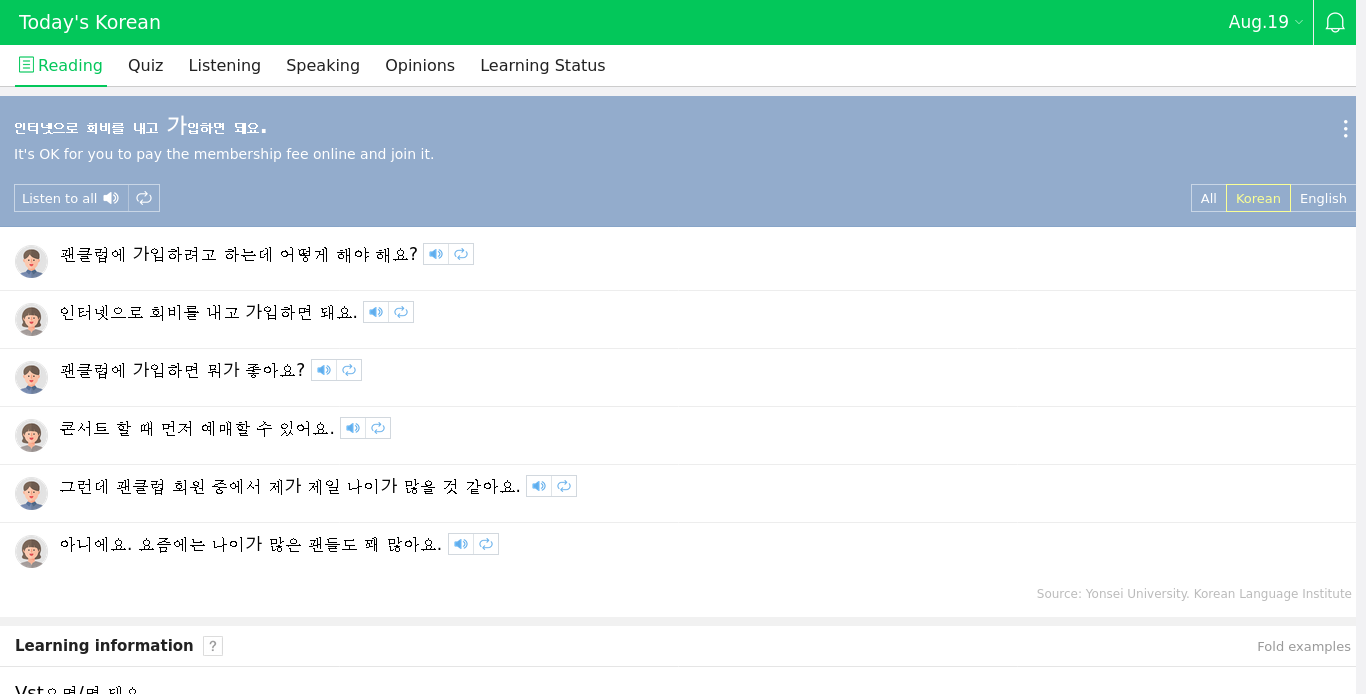

In [19]:
# Navigating to website
browser.get("https://learn.dict.naver.com/conversation#/korean-en")
print(browser.current_url)

# Giving the page up to 10 seconds to load
wait = selenium_WebDriverWait(browser, 10)
wait.until(selenium_ec.visibility_of_element_located((selenium_By.XPATH, '//div[@class="reading_lst_wrap"]')))

# Taking a screenshot of the webpage
browser.save_screenshot("screenshot.png")
Image("screenshot.png", width=800, height=500)

Awesome! Looks like we're on the same page.

**Viewing page source**

In [20]:
# Waiting for another 10 seconds to make sure the page is complete
time.sleep(10)

# Retrieving page source
page = browser.page_source
page[0:1000]

'<html xml:lang="ko" ng-app="mainApp" ng-controller="htmlController" class="ng-scope"><head><style type="text/css">@charset "UTF-8";[ng\\:cloak],[ng-cloak],[data-ng-cloak],[x-ng-cloak],.ng-cloak,.x-ng-cloak,.ng-hide:not(.ng-hide-animate){display:none !important;}ng\\:form{display:block;}.ng-animate-shim{visibility:hidden;}.ng-anchor{position:absolute;}</style>\n\t\t<meta charset="utf-8">\n\t\t<meta http-equiv="X-XSS-Protection" content="1">\n\t\t<meta name="viewport" id="viewport" content="initial-scale=1.0,minimum-scale=1.0,maximum-scale=1.0,user-scalable=no">\n\t\t<!-- for Facebook -->\n\t\t<meta property="og:title" id="ogTitle" content="오늘의 회화 - 인터넷으로 회비를 내고 가입하면 돼요.">\n\t\t<meta property="og:type" content="article">\n\t\t<meta property="og:description" id="ogDesc" content="오늘은 어떤 내용일까요? 지금 확인해보세요!">\n\t\t<meta property="og:image" content="https://ssl.pstatic.net/dicimg/wordbook-mobile-endic/img/enwordbook_icon_20171204.png">\n\t\t<meta property="og:url" id="ogUrl" content="http://m

A bit messy.. Let's use regular expressions to find what we need.

In [21]:
# regex to extract conversation date
date = re.findall(r'var regionDate = "([0-9]+)"', page)
# regex to extract conversation title in korean
kor_title = re.findall(r'id="ogTitle" content="오늘의 회화 - (.+)">', page)
# regex to extract conversation title in english
eng_title = re.findall(r'<span class="txt_trans ng-binding" ng-bind="title_translation">(.+)</span>', page)
# regex to extract sentence pairs
eng_sents = re.findall(r'<div.+item.trsl_sentence">(.+)</div>', page)
kor_sents = re.findall(r'<span class="u_word_dic" data-hook="tip" data-type="arken" data-lang="ko">(.+)</span></span>', page)

Did we get it?

In [22]:
date

['20200819']

In [23]:
kor_title

['인터넷으로 회비를 내고 가입하면 돼요.']

In [24]:
eng_title

["It's OK for you to pay the membership fee online and join it."]

In [25]:
eng_sents

['What should I do to join the fan club?',
 "It's OK for you to pay the membership fee online and join it.",
 'What is good if I join the fan club?',
 'You can reserve tickets for the concert prior to others.',
 'By the way, I might be the oldest among the fan club members.',
 'No, you are not. These days, there are quite a lot of old-aged fans.']

In [26]:
kor_sents[0:3]

['팬클럽에</span> <span class="u_word_dic" data-hook="tip" data-type="arken" data-lang="ko">가입하려고</span> <span class="u_word_dic" data-hook="tip" data-type="arken" data-lang="ko">하는데</span> <span class="u_word_dic" data-hook="tip" data-type="arken" data-lang="ko">어떻게</span> <span class="u_word_dic" data-hook="tip" data-type="arken" data-lang="ko">해야</span> <span class="u_word_dic" data-hook="tip" data-type="arken" data-lang="ko">해요</span>?',
 '인터넷으로</span> <span class="u_word_dic" data-hook="tip" data-type="arken" data-lang="ko">회비를</span> <span class="u_word_dic" data-hook="tip" data-type="arken" data-lang="ko">내고</span> <span class="u_word_dic" data-hook="tip" data-type="arken" data-lang="ko">가입하면</span> <span class="u_word_dic" data-hook="tip" data-type="arken" data-lang="ko">돼요</span>.',
 '팬클럽에</span> <span class="u_word_dic" data-hook="tip" data-type="arken" data-lang="ko">가입하면</span> <span class="u_word_dic" data-hook="tip" data-type="arken" data-lang="ko">뭐가</span> <span class="u_wo

In [27]:
# Stripping HTML tags from text
def strip_tags(sent):
    sent = re.sub(r'<.+?>', '', sent)
    return sent

In [28]:
kor_sents = list(map(strip_tags, kor_sents))
kor_sents = kor_sents[0:len(eng_sents)]
kor_sents

['팬클럽에 가입하려고 하는데 어떻게 해야 해요?',
 '인터넷으로 회비를 내고 가입하면 돼요.',
 '팬클럽에 가입하면 뭐가 좋아요?',
 '콘서트 할 때 먼저 예매할 수 있어요.',
 '그런데 팬클럽 회원 중에서 제가 제일 나이가 많을 것 같아요.',
 '아니에요. 요즘에는 나이가 많은 팬들도 꽤 많아요.']

Sweet!

**Extracting more variables**

In [29]:
# Extracting grammar of the day
grammar = re.findall(r'<span jxb-bind-compiled-html.+item[.]entry_name.+"ng-scope">(.+)</span></span>\s+</div>', page)
grammar = list(map(strip_tags, grammar))
grammar

['Vst으면/면 돼요.']

In [30]:
# Extracting grammar description
grammar_desc = re.findall(r'<span class="txt_trans ng-binding" ng-bind="item.mean">(.+)</span>\s+</div>', page)
grammar_desc = list(map(strip_tags, grammar_desc))
grammar_desc

['It is used to indicate any condition or action is sufficient or the problem is solved by that condition or action.']

In [31]:
# Extracting grammar of the day sentence examples
grammar_sents_eng = re.findall(r'<span class="txt_trans ng-binding" ng-bind-html="desc[.]trans.+toHtml">(.+)</span>', page)
grammar_sents_eng

["It's OK to put in pork since we have some pork though we don't have beef.",
 "Though the bookstore doesn't have the book that you are looking for, it's OK that you can borrow it from the library.",
 "It’s OK that the house is comfortable though it's not big."]

In [32]:
grammar_sents_kor = re.findall(r'<span class="txt_origin ng-isolate-scope" jxb-bind-compiled-html="toAutolinkText\(desc[.]origin\)"><span class="ng-scope"><span class="u_word_dic" data-hook="tip" data-type="arken" data-lang="ko">(.+)</span></span>', page)
grammar_sents_kor = list(map(strip_tags, grammar_sents_kor))
grammar_sents_kor

['소고기가 없어도 돼지고기가 있으니까 돼지고기를 넣으면 돼요.',
 '서점에 찾는 책이 없으면 도서관에서 빌리면 돼요.',
 '집이 크지 않아도 편하면 돼요.']

**Organizing variables for DataFrame creation**

Let's create two DataFrames:

**convo_titles**
(with columns: date, kor_title, eng_title, grammar, grammar_desc, grammar_sents)

**convos**
(with columns: date, conversation_id, kor_sent, eng_sent, qna_id)

Each convo_title has more or less 4 - 8 Korean-English sentence pairs found in convos_table.

Creating convo_titles DataFrame

In [33]:
# convo_titles dataframe columns
title_cols = {
    'date': date,
    'kor_title': kor_title,
    'eng_title': eng_title,
    'grammar': grammar,
    'grammar_desc': grammar_desc
}

# Creating convo_titles DataFrame
convo_titles = pd.DataFrame(title_cols)
convo_titles

,date,kor_title,eng_title,grammar,grammar_desc
0,20200819,인터넷으로 회비를 내고 가입하면 돼요.,It's OK for you to pay the membership fee onli...,Vst으면/면 돼요.,It is used to indicate any condition or action...


In [34]:
# Adding new columns: grammar sentence examples    
for i in range(len(grammar_sents_eng)):
    col = f'grammar_kor_sent_{i+1}'
    convo_titles[col] = grammar_sents_kor[i]
    col = f'grammar_eng_sent_{i+1}'
    convo_titles[col] = grammar_sents_eng[i]
    
convo_titles

,date,kor_title,eng_title,grammar,grammar_desc,grammar_kor_sent_1,grammar_eng_sent_1,grammar_kor_sent_2,grammar_eng_sent_2,grammar_kor_sent_3,grammar_eng_sent_3
0,20200819,인터넷으로 회비를 내고 가입하면 돼요.,It's OK for you to pay the membership fee onli...,Vst으면/면 돼요.,It is used to indicate any condition or action...,소고기가 없어도 돼지고기가 있으니까 돼지고기를 넣으면 돼요.,It's OK to put in pork since we have some pork...,서점에 찾는 책이 없으면 도서관에서 빌리면 돼요.,Though the bookstore doesn't have the book tha...,집이 크지 않아도 편하면 돼요.,It’s OK that the house is comfortable though i...


Creating convos DataFrame

In [35]:
# convos dataframe columns
convos_cols = {
    'date': [date for date in date for _ in range(len(eng_sents))],
    'conversation_id': [id+1 for id, _ in enumerate(eng_sents)],
    'kor_sent': kor_sents,
    'eng_sent': eng_sents,
    'qna_id': ''  # from sender or receiver, message or feedback
}

# Creating convos DataFrame
convos = pd.DataFrame(convos_cols)
convos

,date,conversation_id,kor_sent,eng_sent,qna_id
0,20200819,1,팬클럽에 가입하려고 하는데 어떻게 해야 해요?,What should I do to join the fan club?,
1,20200819,2,인터넷으로 회비를 내고 가입하면 돼요.,It's OK for you to pay the membership fee onli...,
2,20200819,3,팬클럽에 가입하면 뭐가 좋아요?,What is good if I join the fan club?,
3,20200819,4,콘서트 할 때 먼저 예매할 수 있어요.,You can reserve tickets for the concert prior ...,
4,20200819,5,그런데 팬클럽 회원 중에서 제가 제일 나이가 많을 것 같아요.,"By the way, I might be the oldest among the fa...",
5,20200819,6,아니에요. 요즘에는 나이가 많은 팬들도 꽤 많아요.,"No, you are not. These days, there are quite a...",


Now, let's do these for years' worth of conversations.

# Scraping years' worth of data

Let's now try to scrape all the Naver Conversation of the Day data from 2017 up to today.

In [36]:
# Creating 2 empty DataFrames to hold conversations and conversation titles
title_cols = [
    'date',  # 'Conversation of the Day' date
    'kor_title',  # 'Conversation of the Day' title in Korean
    'eng_title',  # english translation of the title
    'grammar',  # grammar of the day
    'grammar_desc'  # grammar description
]
convo_titles = pd.DataFrame(columns = title_cols)

convos_cols = [
    'date',  # 'Conversation of the Day' date
    'conversation_id',  # ordered numbering to indicate conversation flow
    'kor_sent',  # korean sentence
    'eng_sent',  # english translation
    'qna_id'  # from sender or receiver, message or feedback
]
convos = pd.DataFrame(columns = convos_cols)

In [37]:
# function to strip html tags from text
def strip_tags(sent):
    sent = re.sub(r'<.+?>', '', sent)
    return sent

Extracting conversations from December 4, 2017 to August 19, 2019

In [38]:
%%time
start_time = time.time()

start_date = '12/04/2017'
end_date = '8/19/2020'

for d in pd.date_range(start=start_date, end=end_date):
    
    # Skip date if Sunday (Weekly Review Quiz)
    if d.day_name() == 'Sunday':
        continue
    
    date = d.strftime('%Y%m%d')
    
    # Navigating to website
    url = f"https://learn.dict.naver.com/conversation#/korean-en/{date}"
    browser.get(url)
    # print(browser.current_url)
    
    # Giving the page up to 10 seconds to load
    wait = selenium_WebDriverWait(browser, 10)
    wait.until(selenium_ec.visibility_of_element_located((selenium_By.XPATH, '//div[@class="reading_lst_wrap"]')))
    
    # Waiting for another 10 seconds before retrieving page source
    time.sleep(10)
    
    # Retrieving page source
    page = browser.page_source
    
    # Extracting data from page
    # regex to extract conversation title in korean
    kor_title = re.findall(r'id="ogTitle" content="오늘의 회화 - (.+)">', page)
    # regex to extract conversation title in english
    eng_title = re.findall(r'<span class="txt_trans ng-binding" ng-bind="title_translation">(.+)</span>', page)
    # regex to extract sentence pairs
    eng_sents = re.findall(r'<div.+item.trsl_sentence">(.+)</div>', page)
    kor_sents = re.findall(r'<span class="u_word_dic" data-hook="tip" data-type="arken" data-lang="ko">(.+)</span></span>', page)
    
    # Stripping HTML tags from kor_sents
    kor_sents = list(map(strip_tags, kor_sents))
    kor_sents = kor_sents[0:len(eng_sents)]
    
    # Extracting grammar of the day
    grammar = re.findall(r'<span jxb-bind-compiled-html.+item[.]entry_name.+"ng-scope">(.+)</span></span>\s+</div>', page)
    grammar = list(map(strip_tags, grammar))
    
    # Extracting grammar description
    grammar_desc = re.findall(r'<span class="txt_trans ng-binding" ng-bind="item.mean">(.+)</span>\s+</div>', page)
    grammar_desc = list(map(strip_tags, grammar_desc))
    
    # Extracting grammar of the day sentence examples
    grammar_sents_eng = re.findall(r'<span class="txt_trans ng-binding" ng-bind-html="desc[.]trans.+toHtml">(.+)</span>', page)
    grammar_sents_kor = re.findall(r'<span class="txt_origin ng-isolate-scope" jxb-bind-compiled-html="toAutolinkText\(desc[.]origin\)"><span class="ng-scope"><span class="u_word_dic" data-hook="tip" data-type="arken" data-lang="ko">(.+)</span></span>', page)
    grammar_sents_kor = list(map(strip_tags, grammar_sents_kor))
    
    # Creating new DataFrame to append to convo_titles
    title_data = {
        'date': date,
        'kor_title': kor_title,
        'eng_title': eng_title,
        'grammar': ['. '.join(grammar)],
        'grammar_desc': ['. '.join(grammar_desc) if len(grammar_desc) > 0 else '']
    }
    title = pd.DataFrame(title_data)
    
#     # Additional columns of title DataFrame
#     for i in range(len(grammar_sents_eng)):
#         col = f'grammar_kor_sent_{i+1}'
#         title[col] = grammar_sents_kor[i]
#         col = f'grammar_eng_sent_{i+1}'
#         title[col] = grammar_sents_eng[i]
    
    # Creating new DataFrame to append to convos
    convo_data = {
        'date': [date for date in [date] for _ in range(len(eng_sents))],
        'conversation_id': [id+1 for id, _ in enumerate(eng_sents)],
        'kor_sent': kor_sents,
        'eng_sent': eng_sents,
        'qna_id': ''
    }
    convo = pd.DataFrame(convo_data)
    
    # Appending extracted data to convo_titles and convos DataFrames
    convo_titles = convo_titles.append(title, ignore_index = True)
    convos = convos.append(convo, ignore_index = True)
    
# Printing shapes
print('convos shape:', convos.shape)
print('convo_titles shape:', convo_titles.shape)
print('Time taken to extract data:', '{:.2f}'.format((time.time() - start_time) / 60))

TimeoutException: Message: 


Let's take a look at the content of our DataFrames.

In [39]:
convos

,date,conversation_id,kor_sent,eng_sent,qna_id
0,20171204,1,안녕하세요?,Hello.,
1,20171204,2,"네, 안녕하세요?",Hello.,
2,20171204,3,저는 유양이에요.,I'm Yooyang.,
3,20171204,4,저는 김우빈이에요.,"I'm Kim, Woobin.",
4,20171205,1,유양 씨는 중국 사람이에요?,"Ms. Yooyang, are you Chinese?",
...,...,...,...,...,...
2609,20190625,2,은행 금리도 낮거니와 부동산 가격은 너무 비싸서 주식 투자로 몰리는 것 같아요.,It seems like many people are driven to stock ...,
2610,20190625,3,제 친구는 1년 치 연봉으로 모두 주식을 샀대요. 폭락이라도 하면 어떻게 하려고....,My friend said he used up a year's salary to b...,
2611,20190625,4,그렇게 되면 큰 손해를 볼 수도 있지만 요즘은 주가가 상승하고 있어서 괜찮을 것 같아요.,"He might suffer a huge loss, but I think it wo...",
2612,20190625,5,"그럼, 저도 해 볼까요? 월급만으로 언제 돈을 모아요?","Well, shall I then? It's hard to save money ju...",


In [40]:
convo_titles

,date,kor_title,eng_title,grammar,grammar_desc
0,20171204,저는 유양이에요.,I'm Yooyang.,N은/는¹ N이에요/예요.,N is the noun. '은/는' is used with a noun to de...
1,20171205,유양 씨는 중국 사람이에요?,"Ms. Yooyang, are you Chinese?",N은/는 N이에요/예요?,It is the interrogative form of 'N은/는 N이에요/예요'.
2,20171206,저는 학생이 아니에요.,I'm not a student.,N은/는 N이/가¹ 아니에요.,It is the negation of 'N은/는 N이에요/예요'. When the...
3,20171207,저 사람은 흐엉 씨예요.,That person is Ms. Huong.,이/그/저 N은/는 N이에요/예요.,이' is used in front of a noun to refer to some...
4,20171208,다니엘 씨는 스티브 씨의 남동생이에요.,Mr. Daniel is Mr. Steve's younger brother.,N은/는 N의 N이에요/예요.,의' is the particle used to make possessive for...
...,...,...,...,...,...
483,20190620,채식주의자가 아니더라도 건강을 위해서 만들어 드시면 좋겠어요.,I hope you cook that for your health even if y...,Vst더라도,It is attached to the stem of an action verb o...
484,20190621,난 무설탕 식품이라고 해서 당분도 안 들어갈뿐더러 몸에도 좋은 줄 알았는데.,I thought these are not only sugar free but al...,Vst을뿐더러/ㄹ뿐더러,It is attached to the stem of an action verb o...
485,20190622,유통기한이 길다고 다 좋은 건 아니야.,Not all of them are good because they have lon...,Vst는다고/은다고/ㄴ다고 다 Vst는/은/ㄴ 건 아니다,It is attached to the stem of a action verb or...
486,20190624,지난주에 재테크에 대한 강의를 한다길래 듣고 왔는데 사람들이 정말 많더라고요.,I've been to a lecture about investment techni...,Vst길래,It is attached to the stem of an action verb o...


Looks good~

**Save to file: conversations.csv, conversation_titles.csv**

In [41]:
# Exporting to CSV files
convos.to_csv('conversations.csv', index = False)
convo_titles.to_csv('conversation_titles.csv', index = False)

In [42]:
# Deleting unwanted files in working directory
!rm -rf firefox
!rm firefox-79.0.tar.bz2
!rm geckodriver.log
!ls ../working

__notebook__.ipynb  conversation_titles.csv  conversations.csv	screenshot.png


**What's next?**
* Automation and scripting: Extracting more data; On-demand data extraction via script
* Dataset creation: Making the dataset user-friendly
* Applications: I could make tons of flashcards, for now

# References
* [K-MOOC: Python Web Scraping](http://blog.naver.com/PostView.nhn?blogId=powhy123&logNo=221193422772&categoryNo=19&parentCategoryNo=0&viewDate=&currentPage=1&postListTopCurrentPage=1&from=postView)
* [Kaggle web scraping via headless Firefox+selenium](https://www.kaggle.com/dierickx3/kaggle-web-scraping-via-headless-firefox-selenium)